In [2]:
# importing required Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [49]:
# import the data set
IData=pd.read_csv("breast-cancer-dataset.csv",index_col='id')
IData.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
IData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

In [8]:
# Checking the shape of the Data
print("Rows     : ",IData.shape[0])
print("Columns  : ",IData.shape[1])

#No missing vale

Rows     :  569
Columns  :  31


In [10]:
IData.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
IData.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [50]:
map_col = {'B': 1, 'M': 0}
IData['new_diagnosis'] = IData['diagnosis'].replace(map_col).astype(int)

In [51]:
IData.new_diagnosis.value_counts()

1    357
0    212
Name: new_diagnosis, dtype: int64

In [52]:
IData.drop('diagnosis',axis=1,inplace=True)

In [53]:
IData.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,new_diagnosis
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [54]:
IData.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,new_diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


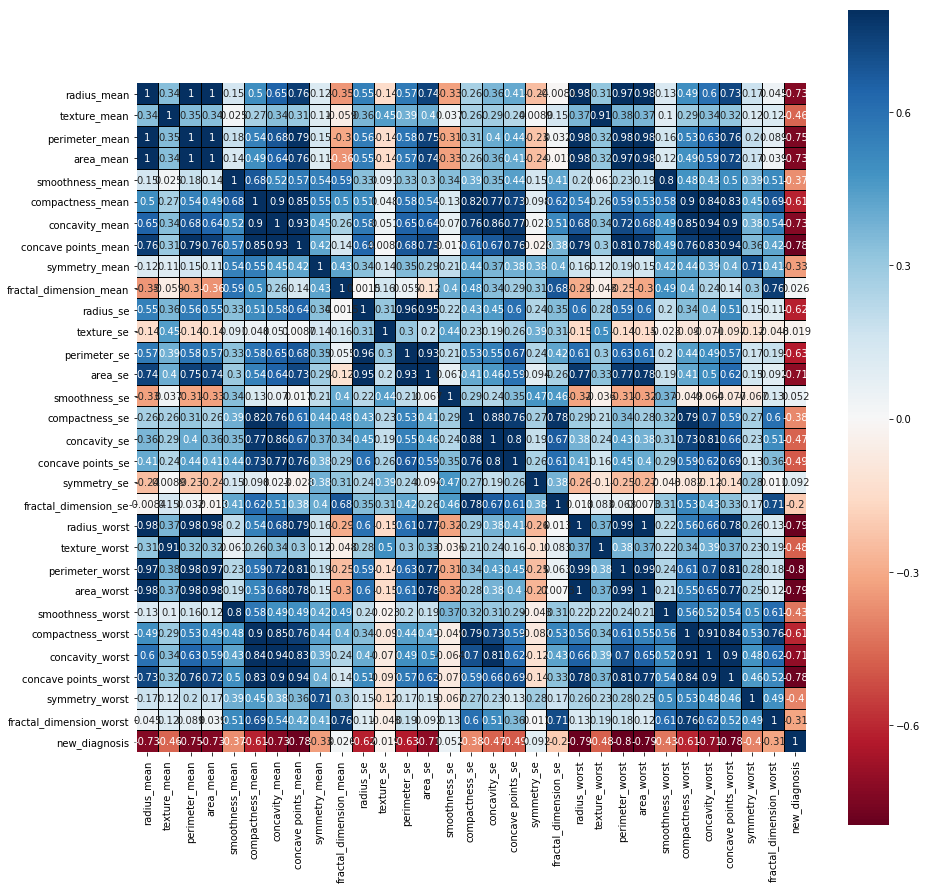

In [55]:
# Correlation
corr=IData.corr(method='spearman')
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='RdBu',linecolor='black')
# here Carlength and Wheelbase are high posotive correlation 0.91, so that this model having multicollinearity.#
# High correlation - carwidth-carlength,curveweight-carlength etc


In [39]:
# Create correlation matrix
corr_matrix = IData.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [40]:
# drop High correlated column

# Drop features 
#IData.drop(IData[to_drop], axis=1,inplace=True)

# by dropping the high correlated column the accuracy come down, so we are considering all features.

In [56]:
# Preprocessing data
X = IData.drop('new_diagnosis', axis=1)  
y = IData['new_diagnosis']

# Train Test Split
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [57]:
#  PCA performs best with a normalized feature set. 
#  We will perform standard scalar normalization to normalize our feature set.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

In [58]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  

In [59]:
explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([4.40881119e-01, 1.96022408e-01, 9.58537338e-02, 6.47374749e-02,
       5.47162984e-02, 3.62759668e-02, 2.24193519e-02, 1.57769093e-02,
       1.38695290e-02, 1.17536519e-02, 9.88314376e-03, 8.54129367e-03,
       7.82102294e-03, 5.00635850e-03, 3.16234491e-03, 2.62288706e-03,
       1.98278454e-03, 1.78853218e-03, 1.45594007e-03, 1.06462390e-03,
       1.00928479e-03, 8.98184083e-04, 8.19499513e-04, 5.58479366e-04,
       5.14148259e-04, 2.66820106e-04, 2.18945797e-04, 5.34312712e-05,
       2.14918728e-05, 4.33971042e-06])

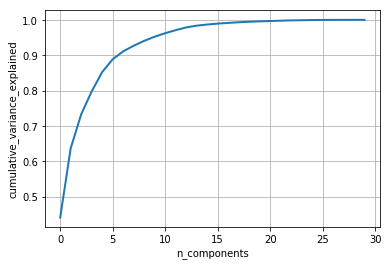

In [60]:
percentage_var_explained=pca.explained_variance_ratio_;
cum_var_explained=np.cumsum(percentage_var_explained)

#plot PCA spectrum
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cumulative_variance_explained')
plt.show()

### From the above graph we can see if we consider 10 components its cover morethan 90% variance


In [61]:
# Let's first try to use 10 principal component to train our algorithm. 
# To do so, execute the following code:
# Train Test Split

pca = PCA(n_components=10)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  

print(X_train[:5])

[[ 3.55192133  1.1372336  -4.04937858  4.25190361 -0.95945678 -1.3114515
   0.01782628  0.01942802  0.43545445 -0.71989895]
 [-2.34291501  1.18687858 -0.7366154  -0.77307794  0.30605074  0.1070271
   0.24049874  0.62179186  0.47718445  0.46827325]
 [-3.10849605  1.44391246  2.63665302 -1.0270518   0.0500357   0.69042833
   0.49211921 -0.49982145  0.58404812 -0.22998543]
 [ 1.10988159 -1.92719066  0.35786578  2.31147688  1.5380698  -0.71148511
  -0.15955482 -0.33680943  0.10697689 -0.6054022 ]
 [-1.43421958  4.84766346  0.39960686 -2.5976997  -3.49622944 -0.34958375
  -0.81657359 -0.94413408 -0.18732721 -0.04411794]]


In [62]:
# Training and Making Predictions
# In this case we'll use random forest classification 
# for making the predictions.
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=5, random_state=0, 
                                    n_estimators=10)  
classifier.fit(X_train, y_train)
# Please Note : if n_estimators is not specified in RandomForestClassifier
# default value of 10 is taken. For this you may get FutureWarning
# To avoid the warning, either specify n_estimators or suppress warnings


# Predicting the Test set results
y_pred = classifier.predict(X_test)  


# Performance Evaluation
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy ' ,  accuracy_score(y_test, y_pred))

[[34  2]
 [ 5 73]]
Accuracy  0.9385964912280702


In [63]:
## Apply Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, y_train) 


# Predict over test_data. 

y_pred=model.predict(X_test)
#print(y_pred)



# Print the accuracy and classification_report.

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("=====Confusion Matrix ===============")
print(confusion_matrix(y_test,y_pred))
print("=============Classification Report===========================")
print(classification_report(y_test,y_pred))
print("===============Accuracy Score=========================")
print(accuracy_score(y_test,y_pred))

## Apply Naive Bayes we have reached 95% Accuracy

=====Confusion Matrix ===============
[[32  4]
 [ 1 77]]
=============Classification Report===========================
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        36
           1       0.95      0.99      0.97        78

    accuracy                           0.96       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

===============Accuracy Score=========================
0.956140350877193
